In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sal = pd.read_csv('./data/mergedSalary2.csv')

In [3]:
# eliminate rows with missing Y values (NaN)
sal['missingSalary'] = pd.isnull(sal['salary'])
sal2 = sal[(sal.missingSalary == False)]

In [4]:
sal2.shape

(2185, 122)

In [5]:
# list of X vars to include
X_numeric_features = ['sup1', 'sup2',
                      'sup3', 'sup4', 
                      'sup5', 'yearsinposition',
                      'yearsinprofession', 'age',
                      'inst1', 'inst2', 'inst3', 
                      'inst4', 'inst5', 'instbudget', 
                      'instsize', 'total_population',
                      'median_household_income', 
                      'no_male_hs', 'no_female_hs', 
                      'no_hs', 'at_least_hs_male', 
                      'at_least_hs_female', 'at_least_hs', 
                      'hs_some_college_male', 'hs_some_college_female',
                      'hs_some_college', 'bachelors_male', 
                      'bachelors_female', 'bachelors',
                      'graduate_male', 'graduate_female', 
                      'graduate', 'hispanic', 'white',
                      'black', 'native_american', 'asian_api', 
                      'two_race_or_more', 'male_unemployment', 
                      'female_unemployment', 'renter', 'owner', 
                      'median_rent', 'Sex.by.Age..Male.',
                      'Sex.by.Age..Female.', 'full_time', 
                      'part_time', 'foreign_born', 'US_born', 
                      'married', 'divorced', 'poverty']
X_numeric = sal2[X_numeric_features]

In [6]:
# create dummy variables for each of the categorical features
# DOC: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

X_categorical_features = ['function', 'gender', 'race', 
                          'highestdegree', 'category', 'insttype',
                          'city', 'state']
X_categorical = sal2[X_categorical_features]

function_dummies = pd.get_dummies(X_categorical['function'])
gender_dummies = pd.get_dummies(X_categorical['gender'])
race_dummies = pd.get_dummies(X_categorical['race'])
highestDegree_dummies = pd.get_dummies(X_categorical['highestdegree'])
category_dummies = pd.get_dummies(X_categorical['category'])
instType_dummies = pd.get_dummies(X_categorical['insttype'])
city_dummies = pd.get_dummies(X_categorical['city'])
state_dummies = pd.get_dummies(X_categorical['state'])

# convert to ndarray
X_dummy_features = pd.concat([function_dummies, gender_dummies, 
                              race_dummies, highestDegree_dummies, 
                              category_dummies, instType_dummies, 
                              city_dummies, state_dummies], axis=1)

In [7]:
# impute missing values in numerical features
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [8]:
# concatenate dummy and imputed numeric for X

X = np.concatenate((X_dummy_features, X_numeric_imputed), axis=1)

In [9]:
# y is salary
y = sal2.loc[:, ['salary']].values

In [10]:
# check y
y[0:10]

array([[ 77308.],
       [ 38120.],
       [ 55335.],
       [ 70863.],
       [ 56557.],
       [ 48489.],
       [ 55557.],
       [ 38120.],
       [ 40500.],
       [ 40500.]])

In [11]:
# check imputed values
np.isnan(X_numeric_imputed).sum()

0

In [12]:
# keep track of variance on test data, to graph
var_to_graph = {}
# bring residual sum of squares from regression1.ipynb
var_to_graph['simpReg'] = 265376883.08

In [13]:
# create training and test sets 
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [14]:
# metrics modeled from github.com/visualizedata/ml
# and github.com/ep866/Machine-Learning

def metrics(model, modelLabel):
    # The intercept
    print('Intercept: \n', model.intercept_)
    # The coefficients
    print('Coefficients: \n', model.coef_)
    # The mean square error           
    print("Residual sum of squares, test data: %.2f"
          % np.mean((model.predict(X_test) - y_test) ** 2))
    print("Residual sum of squares, training data: %.2f"
          % np.mean((model.predict(X_train) - y_train) ** 2))
    var_to_graph[modelLabel] = np.mean((model.predict(X_test) - y_test) ** 2)
    
    # Explained variance score: 1 is perfect prediction
    print('Variance score, test data: %.2f' % model.score(X_test, y_test))
    print('Variance score, training data: %.2f' % model.score(X_train, y_train))
    
    #vector of prediction error
    print('Distribution of prediction error on test data:')
    predError = model.predict(X_test) - y_test
    plt.hist(predError)
    plt.show()
    print('Distribution of prediction error on training data:')
    predError = model.predict(X_train) - y_train
    plt.hist(predError)
    plt.show()

    
    
def scatterPlot(model):   
    print('Plot TEST set:')  
    x = model.predict(X_test)
    plt.scatter(x, y_test,  color='black', alpha=0.5)
    plt.plot(x, x, color='red',
             linewidth=1)
    plt.show()

    print('Plot TRAIN set:')
    x = model.predict(X_train)
    plt.scatter(x, y_train,  color='black', alpha=0.5)
    plt.plot(x, x, color='red',
             linewidth=1)
    plt.show()


In [15]:
# import models for Ridge, Lasso, Linear Regression
from sklearn import datasets, linear_model

# import for polynomial fitting
from sklearn.preprocessing import PolynomialFeatures

Intercept: 
 [ 332564.09087774]
Coefficients: 
 [[ -2.02679662e+03  -1.52761214e+04  -1.92734016e+04  -1.97590813e+04
   -1.15195596e+04  -1.17375116e+04  -1.86743345e+04  -1.96248311e+04
   -1.80913793e+04  -1.07055319e+04  -1.54485830e+04  -9.49528682e+03
   -1.99905040e+04  -2.10441198e+04  -1.67786724e+04  -2.17435825e+04
   -1.68766429e+04  -2.09203236e+04  -1.96775280e+04  -1.84869953e+04
   -1.34192082e+04  -1.04974109e+04  -1.74823320e+04  -1.50575032e+04
   -1.83575614e+04  -1.65296992e+04  -1.62330974e+04  -1.89637560e+04
   -3.06055200e+03  -4.36173280e+03   1.56284821e+03   5.34477384e+03
    9.06181174e+02   4.08472708e+03   4.62066615e+02   1.34284376e+04
    4.87226129e+03   5.02164521e+03   7.02198891e+03   1.70173636e+04
    1.12597837e+04  -3.08608639e+02  -8.01841885e+03   8.01841885e+03
   -4.03893342e+03   3.79362066e+03  -1.59602912e+03   8.74284951e+03
    3.29569989e+04   1.90617382e+03   7.35082334e+03   5.29030812e+03
    9.24838175e+03  -6.87429556e+03   2.32

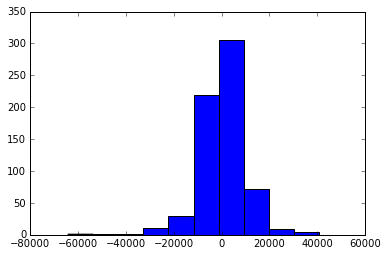

Distribution of prediction error on training data:


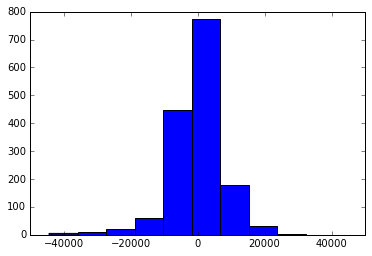

Plot TEST set:


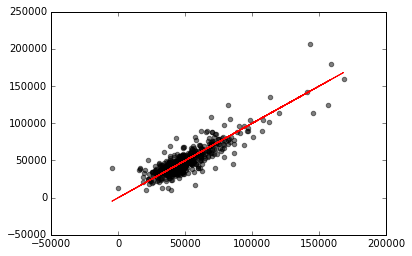

Plot TRAIN set:


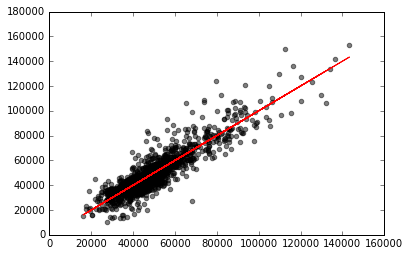

In [16]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

metrics(regr, 'multReg_linear')
scatterPlot(regr)

In [17]:
# Polynomial model
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

In [18]:
# create training and test sets 
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

Intercept: 
 [ -2.79439807e+18]
Coefficients: 
 [[ -1.37595010e+03  -1.42319100e+04  -1.87781470e+04  -1.81775866e+04
   -9.84630721e+03  -1.10602452e+04  -1.77482229e+04  -1.96683415e+04
   -1.87098381e+04  -1.08095632e+04  -1.32055400e+04  -8.83677220e+03
   -1.90845928e+04  -2.04350500e+04  -1.55943506e+04  -2.11925030e+04
   -1.61551021e+04  -1.97691987e+04  -1.62772734e+04  -1.72664261e+04
   -1.56794138e+04  -1.01395084e+04  -1.75055017e+04  -1.46519203e+04
   -1.75821297e+04  -1.59103723e+04  -1.45440572e+04  -1.79754038e+04
   -2.45125561e+03  -3.88744425e+03  -3.41081863e+02   3.58165178e+03
   -1.92483729e+03   2.21352076e+03  -1.76721422e+03   1.23603765e+04
    3.04693154e+03   5.81584421e+03   7.53292968e+03   1.76789580e+04
    1.18045966e+04   2.44603331e+02   2.95114877e+17   6.36315016e+17
    1.46449171e+17   1.46449171e+17   3.12762230e+16  -7.63510368e+16
   -2.27550265e+17   7.73767449e+17  -6.61436371e+17   3.98570979e+16
   -4.60667156e+17  -3.50607727e+17   3.49

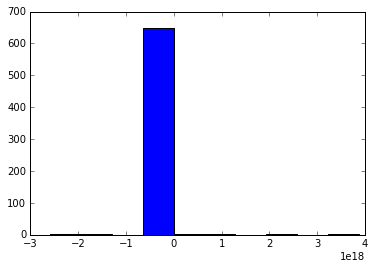

Distribution of prediction error on training data:


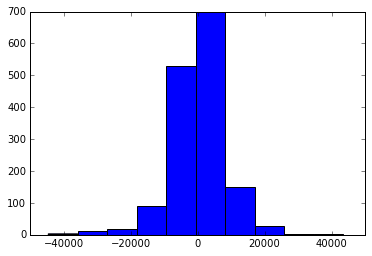

Plot TEST set:


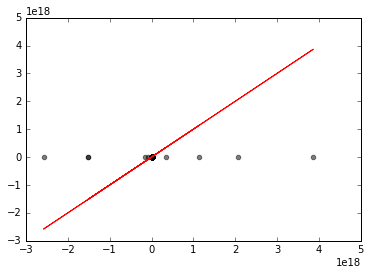

Plot TRAIN set:


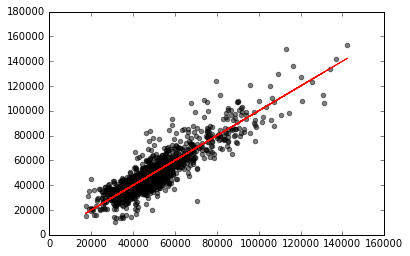

In [19]:
## POLYNOMINAL 
# Create linear regression object
poly = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
poly.fit(X_train, y_train)

metrics(poly, 'multReg_poly')
scatterPlot(poly)

In [20]:
# create training and test sets 
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

Intercept: 
 [ 46620.12853431]
Coefficients: 
 [[  1.00528951e+04   5.04959089e+02  -2.38763093e+03  -2.19941710e+03
    2.36109328e+03   3.04151115e+03  -2.29788294e+03  -2.00138864e+03
   -1.04936974e+03   1.37432385e+03   6.89478381e+02   2.13790191e+03
   -3.17133792e+03  -3.24952168e+03  -8.08001544e+02  -1.41507418e+03
   -6.29778863e+02  -4.63219409e+03  -2.74133897e+02  -1.40300728e+03
    2.98189544e+02   3.99645848e+03  -1.19227985e+03   8.30962088e+02
   -1.69474567e+03  -5.09990664e+01   4.36131342e+01  -2.87304187e+03
    1.43350937e+03   2.50711071e+02  -1.25316740e+03   1.39841538e+03
   -7.22114569e+02   1.47163988e+03  -1.81625297e+03   2.73462307e+03
    1.23644186e+03  -1.47762097e+03   2.64411087e+02   7.98183716e+03
    4.57614552e+03  -6.48469478e+03  -3.41929745e+01   3.41929745e+01
    9.90153365e+02   3.16446334e+02  -2.13684755e+02  -8.21395676e+02
    9.76621044e+02  -3.93494773e+01   3.56399054e+02  -1.06435538e+03
    6.33242943e+02  -5.98168766e+02   1.211

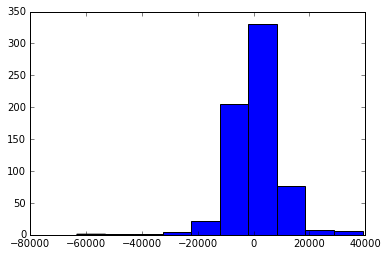

Distribution of prediction error on training data:


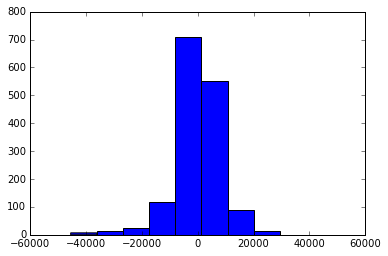

Plot TEST set:


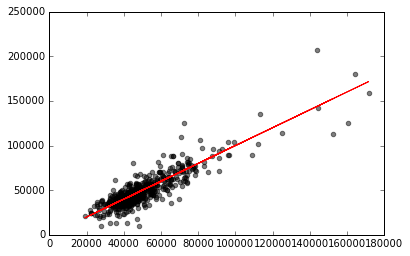

Plot TRAIN set:


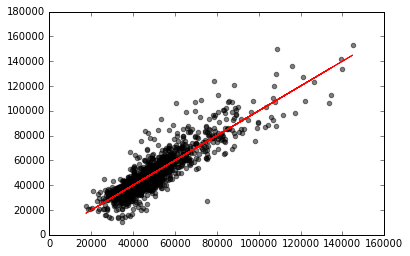

In [21]:
## RIDGE REGRESSION
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# Test first alpha value from grid search results
# gridSearchParameterTuning.ipynb

# Create linear regression object
regr_ridge = linear_model.Ridge(alpha=10)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr_ridge.fit(X_train, y_train)

metrics(regr_ridge, 'multReg_ridge')
scatterPlot(regr_ridge)

In [22]:
# create training and test sets 
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

Intercept: 
 [ 97288.29326278]
Coefficients: 
 [[  1.04929309e+04  -1.34125801e+03  -5.12412224e+03  -5.43085475e+03
    1.90691782e+03   2.20314369e+03  -4.66368189e+03  -5.27140846e+03
   -3.83870436e+03   2.47664103e+03  -1.26683611e+03   2.97292111e+03
   -5.85625339e+03  -6.86010929e+03  -2.90285649e+03  -6.44463022e+03
   -2.71630391e+03  -7.06779634e+03  -3.02082530e+03  -4.30269880e+03
    2.32465527e+02   2.90966866e+03  -3.47707263e+03  -1.02206843e+03
   -4.19486159e+03  -2.46501599e+03  -2.01917100e+03  -5.06446753e+03
    2.17831330e+02  -1.06448033e+03  -6.18954134e+02   2.88485912e+03
   -1.04525927e+03   2.02234130e+03  -1.66909183e+03   9.37842733e+03
    2.69703154e+03   1.94824253e+03   4.06564152e+03   1.37413370e+04
    8.39255856e+03  -3.34814042e+03  -2.38419282e+03   2.38419299e+03
   -6.58998129e+02   1.70027957e+03  -8.28468973e+02  -9.58370461e+02
    5.89502757e+03   4.29884356e+02  -3.90418778e+01  -1.61441664e+03
    1.71741906e+03  -2.72796075e+03   1.408

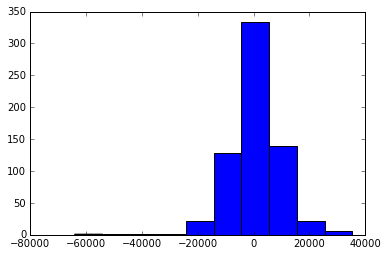

Distribution of prediction error on training data:


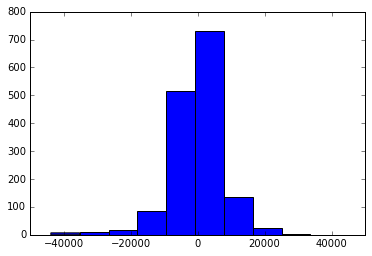

Plot TEST set:


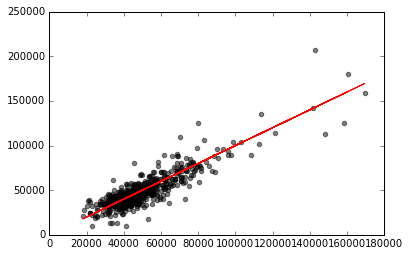

Plot TRAIN set:


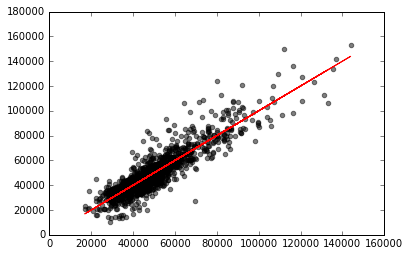

In [23]:
# Test second alpha value from random selection

# Create linear regression object
regr_ridge2 = linear_model.Ridge(alpha=0.8)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr_ridge2.fit(X_train, y_train)

metrics(regr_ridge2, 'multReg_ridge2')
scatterPlot(regr_ridge2)

In [24]:
# create training and test sets 
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

Intercept: 
 [ 51286.26132695]
Coefficients: 
 [[  1.03177917e+04   4.80258161e+02  -2.55216082e+03  -2.42947480e+03
    2.51350568e+03   3.20074124e+03  -2.39663248e+03  -2.23883298e+03
   -1.19334657e+03   1.56444487e+03   6.64428416e+02   2.40043700e+03
   -3.33873684e+03  -3.56062366e+03  -8.83974082e+02  -1.69812424e+03
   -7.08056315e+02  -4.76782465e+03  -3.43023995e+02  -1.57698500e+03
    3.41378976e+02   4.08230569e+03  -1.29679297e+03   8.07329604e+02
   -1.81557099e+03  -1.30027350e+02   5.82568645e-01  -2.97412075e+03
    1.50469487e+03   3.03920810e+02  -1.26734920e+03   1.47431324e+03
   -8.41792068e+02   1.46215943e+03  -1.90622729e+03   3.23975300e+03
    1.36155780e+03  -1.40433233e+03   4.26534686e+02   8.53417800e+03
    4.75755503e+03  -6.45499018e+03  -1.31856434e+02   1.31856434e+02
    9.38090100e+02   4.46725928e+02  -2.70201966e+02  -9.30876256e+02
    1.19454743e+03  -8.14117118e+00   3.69933502e+02  -1.12029538e+03
    7.27719614e+02  -7.27026458e+02   1.318

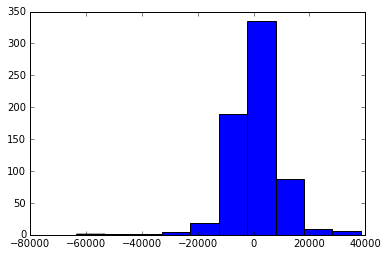

Distribution of prediction error on training data:


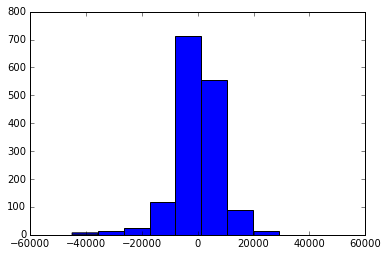

Plot TEST set:


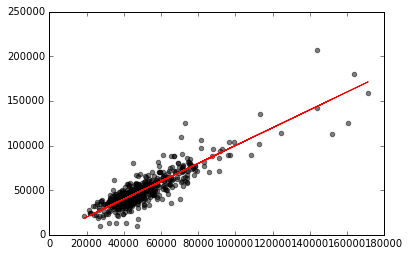

Plot TRAIN set:


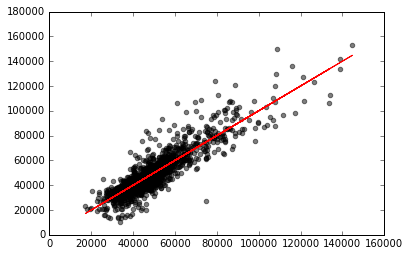

In [25]:
# Test third alpha value from random selection closer to grid results

# Create linear regression object
regr_ridge3 = linear_model.Ridge(alpha=8)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr_ridge3.fit(X_train, y_train)

metrics(regr_ridge3, 'multReg_ridge3')
scatterPlot(regr_ridge3)

In [26]:
# create training and test sets 
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [32]:
## RANDOMIZED LASSO // not quite working
# sklearn can choose a good alpha parameter automatically

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RandomizedLasso

# Data needs to be scaled
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

# Create randomized lasso
rlasso = RandomizedLasso(alpha=0.025)

# Train the model using the training sets
rlasso.fit(X_train_std, y_train)

# metrics with scaled X_train and X_test
    
# Explained variance score: 1 is perfect prediction
print('Variance score, test data: %.2f' % rlasso.score(X_test_std, y_test))
print('Variance score, training data: %.2f' % rlasso.score(X_train_std, y_train))
    


/Users/charliePro/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: 'RandomizedLasso' object has no attribute 'score'